In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn

In [8]:
from textblob import TextBlob

In [2]:
data=pd.read_csv('yelp_restaurant_review.csv')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056227 entries, 0 to 5056226
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 347.2+ MB


# In-depth analysis

In [4]:
df=data.sample(1000)

In [33]:
str(data.text[0])

"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!"

In [20]:
df['polar'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subject'] = df['text'].`apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

use FacetGrid to see if there’s any relationship between our newly created polarity and subjectivity features and the stars rating.

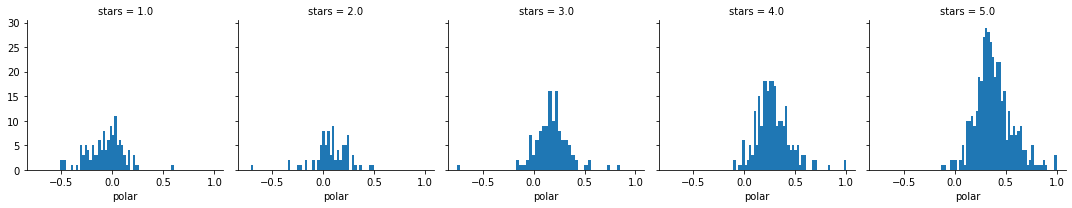

In [23]:
fig = seaborn.FacetGrid(data=df, col='stars')
fig.map(plt.hist, 'polar', bins=50)

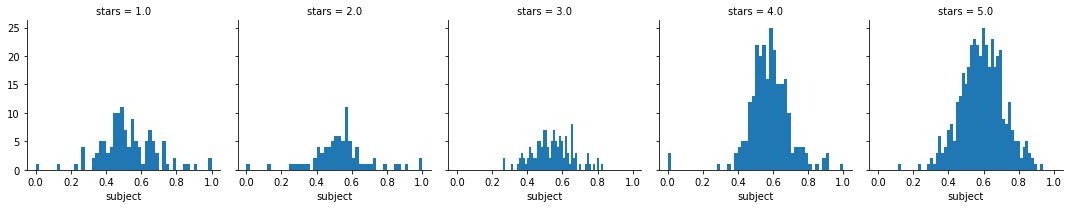

In [26]:
fig = seaborn.FacetGrid(data=df, col='stars')
fig.map(plt.hist, 'subject', bins=50)

In [34]:
data['polar'] = data['text'].apply(lambda tweet: TextBlob(str(tweet)).sentiment.polarity)

use FacetGrid to see if there’s any relationship between our newly created polarity and subjectivity features and the stars rating.

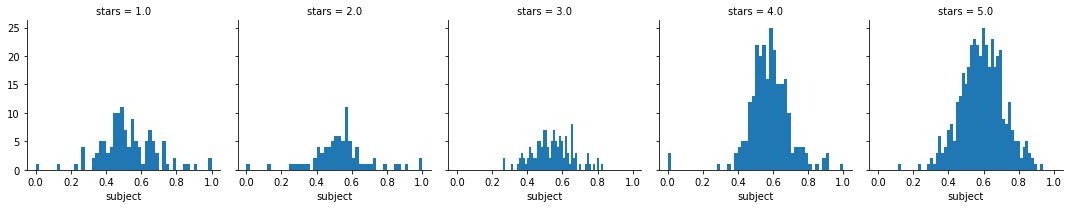

In [26]:
fig = seaborn.FacetGrid(data=df, col='stars')
fig.map(plt.hist, 'subject', bins=50)

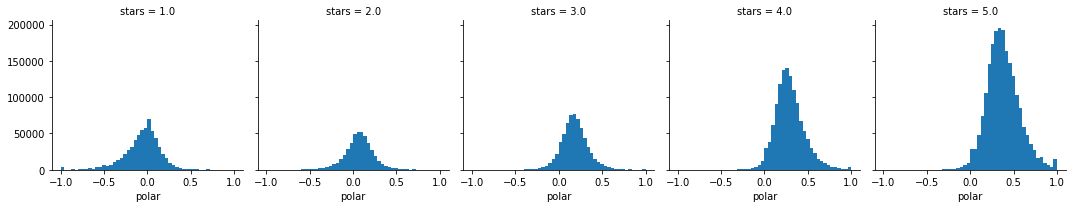

In [35]:
fig = seaborn.FacetGrid(data=data, col='stars')
fig.map(plt.hist, 'polar', bins=50)

In [65]:
sample=data[data['business_id']=='WnS-PoJcV30ctM68vs9wXw']

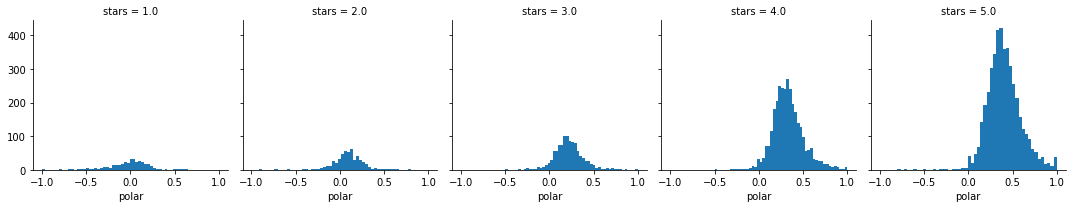

In [43]:
fig4 = seaborn.FacetGrid(data=sample, col='stars')
fig4.map(plt.hist, 'polar', bins=50)

In [56]:
business=data.business_id.value_counts()

In [46]:
count_star=data.groupby('business_id').polar.mean()

In [64]:
count_star[business[:30].index]

RESDUcs7fIiihp38-d6_6g    0.234462
4JNXUYY8wbaaDmk3BPzlWw    0.328668
K7lWdNUhCbcnEvI0NhGewg    0.231255
f4x1YBxkLrZg652xt2KR5g    0.203182
cYwJA2A6I12KNkm2rtXd5g    0.288713
DkYS3arLOhA8si5uUEmHOw    0.263823
faPVqws-x-5k2CQKDNtHxw    0.256087
5LNZ67Yw9RD6nf4_UhXOjw    0.243572
2weQS-RnoOBhb1KsHKyoSQ    0.237274
iCQpiavjjPzJ5_3gPD5Ebg    0.191282
AV6weBrZFFBfRGCbcRGO4g    0.118472
vHz2RLtfUMVRPFmd7VBEHA    0.362936
ujHiaprwCQ5ewziu0Vi9rw    0.197227
El4FC8jcawUVgw_0EIcbaQ    0.140943
QXV3L_QFGj8r6nWX2kS2hA    0.376705
rcaPajgKOJC2vo_l3xa42A    0.272142
JDZ6_yycNQFTpUZzLIKHUg    0.387769
OETh78qcgDltvHULowwhJg    0.290317
3kdSl5mo9dWC4clrQjEDGg    0.386504
KskYqH1Bi7Z_61pH6Om8pg    0.279182
YJ8ljUhLsz6CtT_2ORNFmg    0.276078
RwMLuOkImBIqqYj4SSKSPg    0.256205
eoHdUeQDNgQ6WYEnP2aiRw    0.188239
Wxxvi3LZbHNIDwJ-ZimtnA    0.252393
XXW_OFaYQkkGOGniujZFHg    0.265931
HhVmDybpU7L50Kb5A0jXTg    0.225926
XZbuPXdyA0ZtTu3AzqtQhg    0.297826
hihud--QRriCYZw1zZvW4g    0.390265
utIA0LyQmwP-9DRyxUe6

In [48]:
count_star.sort_values()

business_id
WnS-PoJcV30ctM68vs9wXw   -0.481217
eWfFlL1dIWv6lGK4fhqryA   -0.466065
Q_PtrRkE4yIyJywEOk2KdA   -0.454315
BB0GxHw1WxN_c7pgpkLRMQ   -0.440873
-HfeXGN4O83x8P4rZc-_kQ   -0.402624
                            ...   
0uXkCoDISUHqb0kfUys7Lg    0.710379
MdcncFCUI2DKY5yKhDZLOg    0.738772
l4kN4B7fTasuZemJsvbrOQ    0.747222
9QLKXeNRKXezPn95AOG2vw    0.810913
SY-tkMJOgHqgbUd1tD-yBQ    0.851905
Name: polar, Length: 63961, dtype: float64

# Preliminary Analysis

In [46]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [69]:
data.shape

(5056227, 12)

In [70]:
data=data.dropna()
data.shape

(5056226, 12)

# user

In [ ]:
count=data.groupby('user_id').count()

In [21]:
user=pd.Series(data.user_id)
user_count=user.value_counts()

In [39]:
print(user.describe())

count                    5056227
unique                   1399953
top       CxDOIDnH8gp9KXzpBHJYXw
freq                        2785
Name: user_id, dtype: object


There are 5056227 pieces of reviews provided by 1399953 users. The user whose user_id is 'CxDOIDnH8gp9KXzpBHJYXw' provided 2785 pieces of reviews.

In [40]:
print(user_count.describe())

count    1.399953e+06
mean     3.611712e+00
std      1.158384e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.785000e+03
Name: user_id, dtype: float64


# business

In [47]:
count2=data.groupby('business_id').count()

In [20]:
business_uniq=data['business_id'].unique()
business_uniq.shape

(63961,)

There are 63961 different businesses listed on Yelp.

In [73]:
print(data.business_id.value_counts().describe())

count    63961.000000
mean        79.051703
std        205.933146
min          3.000000
25%          8.000000
50%         23.000000
75%         71.000000
max      10417.000000
Name: business_id, dtype: float64


In [108]:
count2[count2.review_id==3]

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
--U98MNlDym2cLn36BBPgQ,3,3,3,3,3,3,3,3
--lZAZSwpP_axKoL4lR9dQ,3,3,3,3,3,3,3,3
-05uZNVbb8DhFweTEOoDVg,3,3,3,3,3,3,3,3
-0KMvRFwDWdVBeTpT11iHw,3,3,3,3,3,3,3,3
-23R9P2eG7VTc6DVLjFKzA,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...
zw030bjdT5ESvZtB5ekgfw,3,3,3,3,3,3,3,3
zwFRdFxgCV6bF6DAajpCtA,3,3,3,3,3,3,3,3
zwlgRmJxWkeWUMyLcdJjAg,3,3,3,3,3,3,3,3


In [56]:
business=data.business_id.value_counts()

In [46]:
count_star=data.groupby('business_id').polar.mean()

In [64]:
count_star[business[:30].index]

RESDUcs7fIiihp38-d6_6g    0.234462
4JNXUYY8wbaaDmk3BPzlWw    0.328668
K7lWdNUhCbcnEvI0NhGewg    0.231255
f4x1YBxkLrZg652xt2KR5g    0.203182
cYwJA2A6I12KNkm2rtXd5g    0.288713
DkYS3arLOhA8si5uUEmHOw    0.263823
faPVqws-x-5k2CQKDNtHxw    0.256087
5LNZ67Yw9RD6nf4_UhXOjw    0.243572
2weQS-RnoOBhb1KsHKyoSQ    0.237274
iCQpiavjjPzJ5_3gPD5Ebg    0.191282
AV6weBrZFFBfRGCbcRGO4g    0.118472
vHz2RLtfUMVRPFmd7VBEHA    0.362936
ujHiaprwCQ5ewziu0Vi9rw    0.197227
El4FC8jcawUVgw_0EIcbaQ    0.140943
QXV3L_QFGj8r6nWX2kS2hA    0.376705
rcaPajgKOJC2vo_l3xa42A    0.272142
JDZ6_yycNQFTpUZzLIKHUg    0.387769
OETh78qcgDltvHULowwhJg    0.290317
3kdSl5mo9dWC4clrQjEDGg    0.386504
KskYqH1Bi7Z_61pH6Om8pg    0.279182
YJ8ljUhLsz6CtT_2ORNFmg    0.276078
RwMLuOkImBIqqYj4SSKSPg    0.256205
eoHdUeQDNgQ6WYEnP2aiRw    0.188239
Wxxvi3LZbHNIDwJ-ZimtnA    0.252393
XXW_OFaYQkkGOGniujZFHg    0.265931
HhVmDybpU7L50Kb5A0jXTg    0.225926
XZbuPXdyA0ZtTu3AzqtQhg    0.297826
hihud--QRriCYZw1zZvW4g    0.390265
utIA0LyQmwP-9DRyxUe6

In [48]:
count_star.sort_values()

business_id
WnS-PoJcV30ctM68vs9wXw   -0.481217
eWfFlL1dIWv6lGK4fhqryA   -0.466065
Q_PtrRkE4yIyJywEOk2KdA   -0.454315
BB0GxHw1WxN_c7pgpkLRMQ   -0.440873
-HfeXGN4O83x8P4rZc-_kQ   -0.402624
                            ...   
0uXkCoDISUHqb0kfUys7Lg    0.710379
MdcncFCUI2DKY5yKhDZLOg    0.738772
l4kN4B7fTasuZemJsvbrOQ    0.747222
9QLKXeNRKXezPn95AOG2vw    0.810913
SY-tkMJOgHqgbUd1tD-yBQ    0.851905
Name: polar, Length: 63961, dtype: float64

In [49]:
data[data['business_id']=='SY-tkMJOgHqgbUd1tD-yBQ']

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polar
2690148,7CQPB3rmTtmou-QeefghDQ,G_DSxYnez-VMZuvAzzOqZw,SY-tkMJOgHqgbUd1tD-yBQ,5.0,0,0,0,"Beau resto avec images d'Angkor sur les murs, ...",2015-09-17 00:27:05,1.000000
2706568,szlPHxO2-ozH8RTIEC7KdQ,hu_Gp8oTW7bhEhB8_xPTLw,SY-tkMJOgHqgbUd1tD-yBQ,4.0,0,0,0,Excellent repas pris à ce restaurant. Service ...,2016-08-01 02:43:07,1.000000
2838645,09PtvOSlW6mHuS78RyKU0A,AjQVpSaAihkhQuzszKHzZw,SY-tkMJOgHqgbUd1tD-yBQ,5.0,0,1,0,Amazing dishes and nice ambience. The service ...,2015-08-15 03:30:57,0.555714


In [50]:
data[data['business_id']=='9QLKXeNRKXezPn95AOG2vw']

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polar
3714946,2oDljnl_A-gusM_rOLM38g,pq8hKpl-FSbTihJJWx0UQw,9QLKXeNRKXezPn95AOG2vw,4.0,1,0,1,The place is nice and neat but I feel like the...,2018-06-03 00:16:58,0.243651
3798959,Tu6Dl4mabKMHIWaML_4QTQ,MqjvlZEkHncLyvmDONOnVw,9QLKXeNRKXezPn95AOG2vw,5.0,0,0,0,Excellent petit nouveau restaurant de cuisine ...,2018-03-29 18:32:44,1.000000
3799930,SMD1zD6zzSlilO3eyne4Eg,flFwLID_TMeJYloWQAF9XQ,9QLKXeNRKXezPn95AOG2vw,5.0,0,0,0,Excellent nouveau restaurant que j'ai chaudeme...,2018-06-26 07:51:42,1.000000
3964849,ljmWUKjuBXQTkhvU0AECAw,8PnXhbflhoF-DT-liu72gQ,9QLKXeNRKXezPn95AOG2vw,4.0,0,0,0,C'est une très bonne rôtisserie Péruvienne qui...,2018-08-19 18:34:29,1.000000


# date

In [42]:
data.date

0          2015-12-05 03:18:11
1          2011-05-27 05:30:52
2          2017-01-14 21:56:57
3          2013-05-07 07:25:25
4          2015-11-05 23:11:05
                  ...         
5056222    2017-01-10 04:18:30
5056223    2019-12-10 04:15:00
5056224    2019-06-06 15:01:53
5056225    2018-07-05 18:45:21
5056226    2019-12-07 00:29:55
Name: date, Length: 5056227, dtype: object

In [54]:
data[['year','month','day']]=data.date.str.split("-",expand=True)

In [67]:
print(data.year.value_counts())

2018    815340
2017    758932
2019    737399
2016    685448
2015    598626
2014    449915
2013    313267
2012    240266
2011    202868
2010    128862
2009     69780
2008     37567
2007     13844
2006      3518
2005       588
2004         7
Name: year, dtype: int64


In [119]:
year=pd.DataFrame(data.year.value_counts(),columns=['sum'])

year.reset_index(level=0, inplace=True)

year=year.rename(columns={'index':'year'})
year=year.sort_values(by='year')

year.plot.line(x='year',y='sum',title='total review numbers by year')

In [ ]:
print(data.month.value_counts().describe())

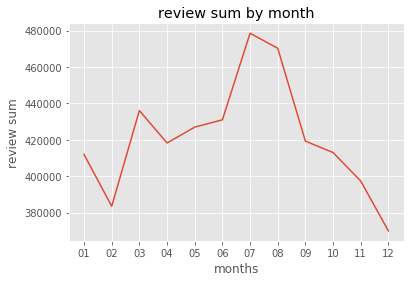

In [103]:
plt.style.use('ggplot') 
plt.plot(data.groupby('month').count()['review_id'])
plt.xlabel('months', size = 12)
plt.ylabel('review sum', size = 12)
plt.title('review sum by month')
plt.show()

# the marks

In [38]:
print(data.describe())

              stars        useful         funny          cool
count  5.056227e+06  5.056227e+06  5.056227e+06  5.056227e+06
mean   3.731080e+00  1.087902e+00  4.339174e-01  5.715042e-01
std    1.394407e+00  3.184392e+00  2.204373e+00  2.447289e+00
min    1.000000e+00 -1.000000e+00  0.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  1.122000e+03  9.760000e+02  5.020000e+02


average star 3.73, half of the reviews give higher than 4 stars.  Only 25% of the reviews get 'useful'. Really few reviews can get 'funny' or 'cool'. While considering the maximum counts, some specific reviews may get a lot of these marks.

The top ten users who get most 'useful' marks.

In [92]:
data.groupby('user_id').sum().sort_values(by=['useful'],ascending=False).head(10)

,stars,useful,funny,cool
user_id,,,,
zFYs8gSUYDvXkb6O7YkRkw,1936.0,34079,23762,31939
bLbSNkLggFnqwNNzzq-Ijw,4840.0,22906,11196,16171
DK57YibC5ShBmqQl97CKog,2435.0,16566,9443,14693
8DEyKVyplnOcSKx39vatbg,1540.0,13860,9228,11012
PGeiszoVusiv0wTHVdWklA,938.0,13560,6323,11882
I-4KVZ9lqHhk8469X9FvhA,1410.0,13176,7182,12440
Mfmx6DSGOrJjr4jeWmqCuw,1175.0,12010,5468,11226
Fv0e9RIV9jw5TX3ctA1WbA,1280.0,11926,7874,10730
A0j21z2Q1HGic7jW6e9h7A,1478.0,11213,7790,9997


In [93]:
data.stars.unique()

array([5., 1., 4., 3., 2.])

In [94]:
onestar=data[data.stars==1]
onestar.shape

(628120, 12)

top 10 of users who gave most one-star reviews.

In [95]:
onestar.groupby('user_id').count().sort_values(by=['review_id'],ascending=False).head(10)

,review_id,business_id,stars,useful,funny,cool,text,date,month,year,day
user_id,,,,,,,,,,,
ELcQDlf69kb-ihJfxZyL0A,223,223,223,223,223,223,223,223,223,223,223
v7FPnMzdbl6J7U_8H1BWZA,197,197,197,197,197,197,197,197,197,197,197
0ygWZ_gXF8qTm0bY95JJqA,85,85,85,85,85,85,85,85,85,85,85
ic-tyi1jElL_umxZVh8KNA,79,79,79,79,79,79,79,79,79,79,79
DPitNu466172os6m0Yri1Q,75,75,75,75,75,75,75,75,75,75,75
-9S_Fh-sQebyB1yhEM5zHw,74,74,74,74,74,74,74,74,74,74,74
xNKjIktegMyHVSXFznJTRg,72,72,72,72,72,72,72,72,72,72,72
shtTK2s3HkN1D0SfTIuAlA,72,72,72,72,72,72,72,72,72,72,72
m35ODBrr76JYr20nxoMg_w,65,65,65,65,65,65,65,65,65,65,65


percentage

In [188]:
star=data.stars.value_counts(normalize=True)

star=pd.DataFrame(star)

#star.reset_index(level=0, inplace=True)

#star=star.rename(columns={'index':'stars','stars':'proportion'})

In [189]:
star

,stars
5.0,0.410899
4.0,0.248040
3.0,0.126531
1.0,0.124227
2.0,0.090304


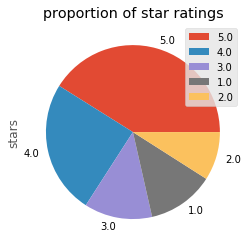

In [196]:
star.plot.pie(y='stars',title='proportion of star ratings')

In [104]:
df=data.groupby('year').mean()

In [105]:
df

,stars,useful,funny,cool
year,,,,
2004,4.285714,0.571429,0.285714,0.285714
2005,4.039116,0.998299,0.619048,0.724490
2006,3.805571,1.133030,0.575327,0.711200
2007,3.774126,1.703626,0.893167,1.185496
2008,3.688423,1.975111,1.148002,1.392339
2009,3.654557,1.932502,1.020808,1.199441
2010,3.657991,1.744191,0.788658,0.958615
2011,3.643478,1.486918,0.638277,0.731274
2012,3.621253,1.481362,0.596372,0.649468
